In [1]:
from numpy import unique, argmax
from keras.datasets.mnist import load_data
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_train = unpickle('CIFAR/train')
x_train = batch_train[b'data']
y_train = batch_train[b'fine_labels']

In [4]:
batch_test = unpickle('CIFAR/test')

x_test = batch_test[b'data']
x_testR = x_test
y_test = batch_test[b'fine_labels']

In [5]:
x_train.shape

(50000, 3072)

In [6]:
x_train = np.reshape(x_train, (-1, 3, 32, 32)).transpose(0, 2, 3, 1)
x_test = np.reshape(x_train, (-1, 3, 32, 32)).transpose(0, 2, 3, 1)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [9]:
x_train= x_train / 255
x_test = x_test /255

In [18]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))

model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(1200, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=128, validation_split=0.1)

352/352 [==============================] - 116s 326ms/step - loss: 3.5981 - accuracy: 0.1730 - val_loss: 3.0798 - val_accuracy: 0.2608


In [14]:
model.save('resources/cifar100.h5')

In [21]:
fine_labels = np.array([
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
])

1/1 [==============================] - 0s 36ms/step
Predicted: chair


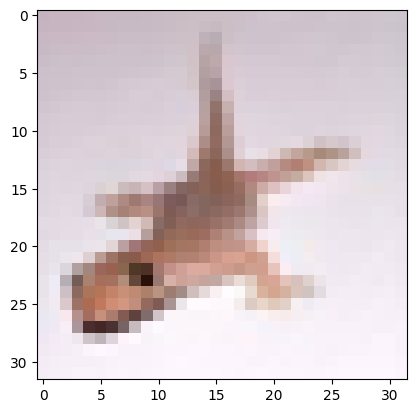

In [31]:
x = batch_test[b'data']
x = np.reshape(x, (-1, 3, 32, 32)).transpose(0, 2, 3, 1)
image = x[206]

plt.imshow(np.squeeze(image))

image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

yhat = model.predict([image])
i = int(argmax(yhat))
print('Predicted: {}'.format(fine_labels[i]))